In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

print(os.getcwd())
print("Modules imported \n")
import os

#from sklearn.preprocessing import Imputer
#from pandas.tools.plotting import scatter_matrix
#from sklearn.utils.fixes import signature

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#import torch
#from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from fastai import *
from fastai.tabular import * 

/content
Modules imported 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs"

combined_dataset-1.csv
combined_dataset.csv
info.csv
lgb.csv
sample_submission_Aug_29th.csv
sample_submission_Aug_29th-fastai-10.1.csv
sample_submission_Aug_29th-fastai-10.2.csv
sample_submission_Aug_29th-fastai-10.3.csv
sample_submission_Aug_29th-fastai-10.4.csv
sample_submission_Aug_29th-fastai-10.csv
sample_submission_Aug_29th-fastai-2.csv
sample_submission_Aug_29th-fastai-3.csv
sample_submission_Aug_29th-fastai-4.csv
sample_submission_Aug_29th-fastai-5.csv
sample_submission_Aug_29th-fastai-6.csv
sample_submission_Aug_29th-fastai-7.csv
sample_submission_Aug_29th-fastai-8.csv
sample_submission_Aug_29th-fastai-9.csv
sample_submission_Aug_29th-fastai.csv
sample_submission_Aug_29th-lgb.csv
sample_submission_Aug_30th-lgb-1.csv
sample_submission_Aug_31st-lgb-3.csv
sample_submission_Aug_31st_RF.csv
sample_submission.csv
test.csv
train.csv
train_data_dict.csv
xgb.csv


In [ ]:
# Read data
train = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/test.csv')
sample_sub  = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/sample_submission.csv') 

In [ ]:
print(train.shape)
train.info()
train.describe()

(318438, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient         

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
print(test.shape)
test.info()
test.describe()

(137057, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient         

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [ ]:
y = train['Stay']

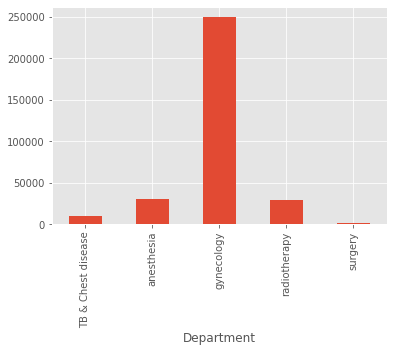

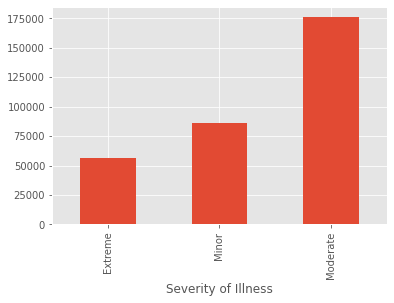

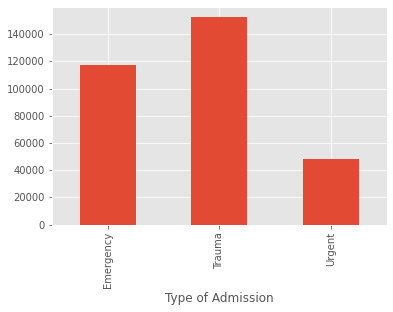

In [ ]:
train.groupby('Department').size().plot.bar()
plt.show()
train.groupby('Severity of Illness').size().plot.bar()
plt.show()
train.groupby('Type of Admission').size().plot.bar()
plt.show()

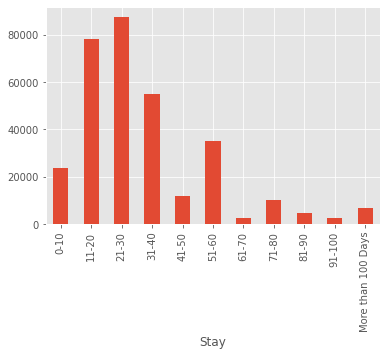

In [ ]:
train.groupby('Stay').size().plot.bar()
plt.show()

In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
len(train['patientid'].unique())

92017

In [ ]:
trainhospID = set(train['Hospital_code'])
testhospID = set(test['Hospital_code'])

print("set1 intersection set2 : ", trainhospID.intersection(testhospID)) 
len(testhospID)
len(trainhospID)


set1 intersection set2 :  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}


32

In [ ]:
train['Bed Grade'].fillna(value=2.0, inplace=True)
train['City_Code_Patient'].fillna(value=-99, inplace=True)

In [ ]:
test['Bed Grade'].fillna(value=2.0, inplace=True)
test['City_Code_Patient'].fillna(value=-99, inplace=True)

In [ ]:
#Models - Cat Boost

In [ ]:
# target = 'Stay'
# cat_cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
#       'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','patientid','City_Code_Patient','Type of Admission','Severity of Illness','Age']
# cat_cols_indices = [train.columns.tolist().index(x) for x in cat_cols]
# cat_cols_indices

In [ ]:
#!pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# #model = CatBoostClassifier(iterations=50)
# model = CatBoostClassifier(learning_rate=0.01, eval_metric='Accuracy', od_wait=400, iterations=10000)

In [ ]:
#np.where(train.dtypes != np.float)[0]

In [ ]:
FEATS_EXCLUDED = ['Stay']
usecols = [f for f in train.columns if f not in FEATS_EXCLUDED]

In [ ]:
# train['Bed Grade'] = train['Bed Grade'].astype(str)
# test['Bed Grade'] = test['Bed Grade'].astype(str)

# train['City_Code_Patient'] = train['City_Code_Patient'].astype(str)
# test['City_Code_Patient'] = test['City_Code_Patient'].astype(str)

# train['Admission_Deposit'] = train['Admission_Deposit'].astype(str)
# test['Admission_Deposit'] = test['Admission_Deposit'].astype(str)


In [ ]:
train['meanStay'] = train['Stay'].map({'0-10':5,
                                    '11-20':15,
                                    '21-30':25,                                     
                                    '31-40':35,
                                    '41-50':45,
                                    '51-60':55,
                                    '61-70':65,
                                    '71-80':75,
                                    '81-90':85,
                                    '91-100':95,
                                    'More than 100 Days':105
                                     })

In [ ]:
train['meanStay'].value_counts()

25     87491
15     78139
35     55159
55     35018
5      23604
45     11743
75     10254
105     6683
85      4838
95      2765
65      2744
Name: meanStay, dtype: int64

In [ ]:
train['Stay'] = train['Stay'].map({'0-10':0,
                                    '11-20':1,
                                    '21-30':2,                                     
                                    '31-40':3,
                                    '41-50':4,
                                    '51-60':5,
                                    '61-70':6,
                                    '71-80':7,
                                    '81-90':8,
                                    '91-100':9,
                                    'More than 100 Days':10
                                     })

In [ ]:
# categorical_columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
#       'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Age']

In [ ]:
kf = model_selection.GroupKFold(n_splits=5)

oof_cat = np.zeros(train.shape[0])

for dev_index, val_index in kf.split(train[usecols], train["Stay"].values, train["patientid"].values):
    print(train["patientid"].loc[val_index].unique())

    dev_X, val_X = train[usecols].loc[dev_index,:], train[usecols].loc[val_index,:]
    dev_y, val_y = train["Stay"][dev_index], train["Stay"][val_index]
    print(len(dev_X))
    # model.fit(
    # dev_X, dev_y,
    # cat_features=cat_cols_indices,
    # #eval_set=(val_X, val_y),
    # logging_level='Silent',
    # plot=True)
    
    # oof_cat[val_index] = model.predict(val_X)
    # pred_test_cat  = model.predict(test_X)

    # pred_test_full_cat += pred_test_cat
    
# pred_test_full_cat /= 5.



[ 33340  88451 127970 100096 ...  79108  26631    325  91081]
254750
[  8088  64869  30632  82551 ...  41602 122839 120672  21641]
254750
[ 31397  28843  44201 128803 ...  79339  22709  14309 109796]
254750
[ 84932 110115 130244   6112 ... 109647  36018  86499 125235]
254751
[ 63418 109338 115513  83512 ...  38816  70282  87939  50508]
254751


In [ ]:
# train.head()

In [ ]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["Feature", "importance"]].groupby("Feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.Feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance", ascending=False))

In [ ]:
train['Bed Grade'] = train['Bed Grade'].astype('float64')
test['Bed Grade'] = test['Bed Grade'].astype('float64')

# train['City_Code_Patient'] = train['City_Code_Patient'].astype('float64')
# test['City_Code_Patient'] = test['City_Code_Patient'].astype('float64')

train['Admission_Deposit'] = train['Admission_Deposit'].astype('float64')
test['Admission_Deposit'] = test['Admission_Deposit'].astype('float64')

In [ ]:
#FEATURE ENGINEERING

In [ ]:
train.patientid.dtype

dtype('int64')

In [ ]:
train['train_or_test'] = 0
test['train_or_test'] = 1

# Concat train and test data
combined = pd.concat([train, test])

In [ ]:
# fEATURES
# Hospital_code
# Hospital_type_code
# City_Code_Hospital
# Hospital_region_code
# ##Available Extra Rooms in Hospital
# Department
# Ward_Type
# Ward_Facility_Code
# Bed Grade
# patientid
# City_Code_Patient
# Type of Admission
# Severity of Illness
# ##Visitors with Patient
# ##Age
## ##Admission_Deposit

In [ ]:
train['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [ ]:
combined['meanAge'] = combined['Age'].map({'0-10':5,
                                    '11-20':15,
                                    '21-30':25,                                     
                                    '31-40':35,
                                    '41-50':45,
                                    '51-60':55,
                                    '61-70':65,
                                    '71-80':75,
                                    '81-90':85,
                                    '91-100':95,                                    
                                     })

In [ ]:
combined['meanAge'].value_counts()

45    91495
35    90420
55    69506
25    58560
75    50737
65    48619
15    23871
85    11240
5      9140
95     1907
Name: meanAge, dtype: int64

In [ ]:
combined.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,meanStay,train_or_test,meanAge
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0.0,5.0,0,55
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4.0,45.0,0,55


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [ ]:
# Encode labels in columns. 
combined['Hospital_type_code']= label_encoder.fit_transform(combined['Hospital_type_code']) 
combined['Hospital_region_code']= label_encoder.fit_transform(combined['Hospital_region_code']) 
combined['Department']= label_encoder.fit_transform(combined['Department']) 
combined['Ward_Type']= label_encoder.fit_transform(combined['Ward_Type']) 
combined['Ward_Facility_Code']= label_encoder.fit_transform(combined['Ward_Facility_Code']) 
combined['Type of Admission']= label_encoder.fit_transform(combined['Type of Admission']) 
combined['Severity of Illness']= label_encoder.fit_transform(combined['Severity of Illness']) 
combined['Ward_Facility_Code']= label_encoder.fit_transform(combined['Ward_Facility_Code']) 

In [ ]:
# Aggregate

In [ ]:
aggregators = {
'nunique' : lambda x, col : x[col].nunique(),
'mode' : lambda x , col : x[col].value_counts().index[0],
'mean' : lambda x , col : x[col].mean(),
'median' : lambda x , col : x[col].median(),
'std' : lambda x , col : x[col].std(),
'max_' : lambda x , col : x[col].max(),
'min_' : lambda x , col : x[col].min(),
'sum' : lambda x , col : x[col].sum()
}

def group_transaction_by_patient(x):
    d = {}
    serIndex = []
    for col, aggs in GroupByDict.items():
        for agg in aggs:
            name = col + '_' + agg
            d[name] = aggregators[agg](x, col)
            serIndex.append(name)
    return pd.Series(d,serIndex)

In [ ]:
# By Patient
GroupByDict = {
    'Admission_Deposit' : ['mean', 'max_', 'min_', 'std'],
    'Ward_Facility_Code' : ['nunique', 'mode'],
    'Department' : ['nunique', 'mode'],
    'Hospital_region_code' : ['nunique', 'mode'],
    'City_Code_Hospital' : ['nunique', 'mode'],
    'Hospital_type_code' : ['nunique', 'mode'],
    'Hospital_code' : ['nunique', 'mode'],
    'Type of Admission' : ['nunique', 'mode'],
    'Severity of Illness' : ['nunique', 'mode'],
    'Visitors with Patient' : ['mean'],  
}

In [ ]:
combined.shape

(455495, 21)

In [ ]:
%%time
aggData = pd.DataFrame()
tempGrpd = combined.groupby(by = 'patientid').apply(group_transaction_by_patient)
aggData = aggData.append(tempGrpd)

combined = pd.merge(combined, aggData, how="left", on=['patientid'])

CPU times: user 16min 8s, sys: 2.88 s, total: 16min 11s
Wall time: 16min 8s


In [ ]:
# By Hospital
GroupByDict = {
    'meanAge' : ['mean', 'max_', 'min_', 'std'],
    'Admission_Deposit' : ['mean', 'max_', 'min_', 'std'],
    'Type of Admission' : ['nunique', 'mode'],
    'Severity of Illness' : ['nunique', 'mode'],
    'Available Extra Rooms in Hospital' : ['mean', 'max_', 'min_', 'std'],
}

In [ ]:
combined.shape

(455495, 42)

In [ ]:
def group_transaction_by_hospital(x):
    d = {}
    serIndex = []
    for col, aggs in GroupByDict.items():
        for agg in aggs:
            name = col + '_hospital_' + agg
            d[name] = aggregators[agg](x, col)
            serIndex.append(name)
    return pd.Series(d,serIndex)

In [ ]:
aggData = pd.DataFrame()
tempGrpd = combined.groupby(by = 'Hospital_code').apply(group_transaction_by_hospital)
aggData = aggData.append(tempGrpd)
combined = pd.merge(combined, aggData, how="left", on=['Hospital_code'])

In [ ]:
grouped_df = combined.groupby(['Hospital_code','Department'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Hospital_code','Department','hosp_dept_Stay_min','hosp_dept_Stay_max','hosp_dept_Stay_std','hosp_dept_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Hospital_code','Department'])

In [ ]:
grouped_df = combined.groupby(['Hospital_code','Type of Admission'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Hospital_code','Type of Admission','hosp_Adm_Stay_min','hosp_Adm_Stay_max','hosp_Adm_Stay_std','hosp_Adm_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Hospital_code','Type of Admission'])

In [ ]:
grouped_df = combined.groupby(['Hospital_code','Severity of Illness'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Hospital_code','Severity of Illness','hosp_sev_Stay_min','hosp_sev_Stay_max','hosp_sev_Stay_std','hosp_sev_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Hospital_code','Severity of Illness'])

In [ ]:
grouped_df = combined.groupby(['Department'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Department','Dept_Stay_min','Dept_Stay_max','Dept_Stay_std','Dept_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Department'])

In [ ]:
grouped_df = combined.groupby(['Severity of Illness'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Severity of Illness','Sev_Stay_min','Sev_Stay_max','Sev_Stay_std','Sev_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Severity of Illness'])

In [ ]:
grouped_df = combined.groupby(['Type of Admission'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Type of Admission','Typ_Stay_min','Typ_Stay_max','Typ_Stay_std','Typ_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Type of Admission'])

In [ ]:
grouped_df = combined.groupby(['meanAge','Severity of Illness'])['Admission_Deposit'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['meanAge','Severity of Illness','Age_Sev_min','Age_Sev_max','Age_Sev_std','Age_Sev_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['meanAge','Severity of Illness'])

In [ ]:
grouped_df = combined.groupby(['Ward_Facility_Code','Bed Grade'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Ward_Facility_Code','Bed Grade','Bed_fac_min','Bed_fac_max','Bed_fac_std','Bed_fac_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Ward_Facility_Code','Bed Grade'])

In [ ]:
grouped_df = combined.groupby(['Type of Admission','Severity of Illness'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Type of Admission','Severity of Illness','typ_sev1_min','typ_sev1_max','typ_sev1_std','typ_sev1_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Type of Admission','Severity of Illness'])

In [ ]:
grouped_df = combined.groupby(['Hospital_region_code'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Hospital_region_code','r_min','r_max','r_std','r_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Hospital_region_code'])

In [ ]:
grouped_df = combined.groupby(['City_Code_Hospital'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['City_Code_Hospital','c_min','c_max','c_std','c_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['City_Code_Hospital'])

In [ ]:
combined.shape

(455495, 102)

In [ ]:
combined['patient_in_this_hosp'] = combined.groupby(['Hospital_code'])['patientid'].transform('nunique')
combined['patient_cum_visit'] = combined.groupby(['patientid'])['case_id'].cumcount()

In [ ]:
grouped_df = combined.groupby(['meanAge'])['meanStay'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['meanAge','meanAge_Stay_min','meanAge_Stay_max','meanAge_Stay_std','meanAge_Stay_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['meanAge'])

In [ ]:
combined["patient_last_Adm_dep"] = combined.groupby("patientid")["Admission_Deposit"].shift(1)

In [ ]:
path = "drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/"

In [ ]:
combined.to_csv(path+'combined_dataset-1.csv')

In [ ]:
# Can start from here

In [ ]:
path = "drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/"

In [ ]:
combined = pd.read_csv(path+'combined_dataset-1.csv')

In [ ]:
#list(combined.columns)

In [ ]:
combined.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,meanStay,train_or_test,meanAge,Admission_Deposit_mean,Admission_Deposit_max_,Admission_Deposit_min_,Admission_Deposit_std,Ward_Facility_Code_nunique,Ward_Facility_Code_mode,Department_nunique,Department_mode,Hospital_region_code_nunique,Hospital_region_code_mode,City_Code_Hospital_nunique,City_Code_Hospital_mode,Hospital_type_code_nunique,Hospital_type_code_mode,Hospital_code_nunique,Hospital_code_mode,Type of Admission_nunique,Type of Admission_mode,...,hosp_sev_Stay_mean,Dept_Stay_min,Dept_Stay_max,Dept_Stay_std,Dept_Stay_mean,Sev_Stay_min,Sev_Stay_max,Sev_Stay_std,Sev_Stay_mean,Typ_Stay_min,Typ_Stay_max,Typ_Stay_std,Typ_Stay_mean,Age_Sev_min,Age_Sev_max,Age_Sev_std,Age_Sev_mean,Bed_fac_min,Bed_fac_max,Bed_fac_std,Bed_fac_mean,typ_sev1_min,typ_sev1_max,typ_sev1_std,typ_sev1_mean,r_min,r_max,r_std,r_mean,c_min,c_max,c_std,c_mean,patient_in_this_hosp,patient_cum_visit,meanAge_Stay_min,meanAge_Stay_max,meanAge_Stay_std,meanAge_Stay_mean,patient_last_Adm_dep
0,0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,51-60,4911.0,0.0,5.0,0,55,5951.0,8477.0,4449.0,1094.526944,5.0,5.0,3.0,3.0,3.0,1.0,7.0,2.0,7.0,2.0,10.0,26.0,3.0,1.0,...,34.706362,5.0,105.0,23.498793,33.170851,5.0,105.0,23.752762,36.314458,5.0,105.0,22.012829,30.173782,1800.0,10720.0,1095.230313,4776.4455,5.0,105.0,19.161022,31.386030,5.0,105.0,24.721036,34.547974,5.0,105.0,21.637445,32.301114,5.0,105.0,21.687989,32.335677,5114,0,5.0,105.0,22.237034,33.077462,NaN
1,1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,51-60,5954.0,4.0,45.0,0,55,5951.0,8477.0,4449.0,1094.526944,5.0,5.0,3.0,3.0,3.0,1.0,7.0,2.0,7.0,2.0,10.0,26.0,3.0,1.0,...,46.147903,5.0,105.0,23.498793,33.170851,5.0,105.0,23.752762,36.314458,5.0,105.0,21.398377,34.054256,1800.0,10720.0,1095.230313,4776.4455,5.0,105.0,19.161022,31.386030,5.0,105.0,23.413024,38.133128,5.0,105.0,21.637445,32.301114,5.0,105.0,21.586318,32.266034,6134,1,5.0,105.0,22.237034,33.077462,4911.0
2,2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,51-60,4745.0,3.0,35.0,0,55,5951.0,8477.0,4449.0,1094.526944,5.0,5.0,3.0,3.0,3.0,1.0,7.0,2.0,7.0,2.0,10.0,26.0,3.0,1.0,...,34.297935,5.0,105.0,20.044831,29.999494,5.0,105.0,23.752762,36.314458,5.0,105.0,21.398377,34.054256,1800.0,10720.0,1095.230313,4776.4455,5.0,105.0,18.172965,29.967082,5.0,105.0,23.413024,38.133128,5.0,105.0,20.826734,31.673817,5.0,105.0,20.082365,30.521309,12886,2,5.0,105.0,22.237034,33.077462,5954.0
3,3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,51-60,7272.0,4.0,45.0,0,55,5951.0,8477.0,4449.0,1094.526944,5.0,5.0,3.0,3.0,3.0,1.0,7.0,2.0,7.0,2.0,10.0,26.0,3.0,1.0,...,39.751868,5.0,105.0,23.498793,33.170851,5.0,105.0,23.752762,36.314458,5.0,105.0,21.398377,34.054256,1800.0,10720.0,1095.230313,4776.4455,5.0,105.0,19.694885,32.980266,5.0,105.0,23.413024,38.133128,5.0,105.0,22.139425,32.163394,5.0,105.0,22.437276,33.835724,37279,3,5.0,105.0,22.237034,33.077462,4745.0
4,4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,51-60,5558.0,4.0,45.0,0,55,5951.0,8477.0,4449.0,1094.526944,5.0,5.0,3.0,3.0,3.0,1.0,7.0,2.0,7.0,2.0,10.0,26.0,3.0,1.0,...,39.751868,5.0,105.0,23.498793,33.170851,5.0,105.0,23.752762,36.314458,5.0,105.0,21.398377,34.054256,1800.0,10720.0,1095.230313,4776.4455,5.0,105.0,19.694885,32.980266,5.0,105.0,23.413024,38.133128,5.0,105.0,22.139425,32.163394,5.0,105.0,22.437276,33.835724,37279,4,5.0,105.0,22.237034,33.077462,7272.0


In [ ]:
grouped_df = combined.groupby(['Department'])['Visitors with Patient'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['Department','d_min','d_max','d_std','d_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['Department'])

In [ ]:
#combined[].value_counts()
grouped_df = combined.groupby(['meanAge','Severity of Illness'])['Visitors with Patient'].agg(["min","max","std","mean"]).reset_index()
grouped_df.columns = ['meanAge','Severity of Illness','v_min','v_max','v_std','v_mean']
combined = pd.merge(combined, grouped_df, how="left", on=['meanAge','Severity of Illness'])

In [ ]:
def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')
        
# LABEL ENCODE
def encode_LE(col,train=train,test=test,verbose=True):
    df_comb = pd.concat([train[col],test[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32000: 
        train[nm] = df_comb[:len(train)].astype('int32')
        test[nm] = df_comb[len(train):].astype('int32')
    else:
        train[nm] = df_comb[:len(train)].astype('int16')
        test[nm] = df_comb[len(train):].astype('int16')
    del df_comb; x=gc.collect()
    if verbose: print(nm,', ',end='')
        
# GROUP AGGREGATION MEAN AND STD
# https://www.kaggle.com/kyakovlev/ieee-fe-with-some-eda
def encode_AG(main_columns, uids, aggregations=['mean'], train_df=train, test_df=test, 
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                
# COMBINE FEATURES
def encode_CB(col1,col2,df1=train,df2=test):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
    encode_LE(nm,verbose=False)
    print(nm,', ',end='')
    
# GROUP AGGREGATION NUNIQUE
def encode_AG2(main_columns, uids, train_df=train, test_df=test):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [ ]:
train = combined.loc[combined['train_or_test'] == 0]
test = combined.loc[combined['train_or_test'] == 1]


In [ ]:
# COMBINE COLUMNS CARD1+ADDR1, CARD1+ADDR1+P_EMAILDOMAIN
encode_CB('Hospital_code','Hospital_type_code')
encode_CB('Hospital_type_code','Hospital_region_code')
encode_CB('Ward_Type','Ward_Facility_Code')

Hospital_code_Hospital_type_code , Hospital_type_code_Hospital_region_code , Ward_Type_Ward_Facility_Code , 

In [ ]:
# FREQUENCY ENOCDE
encode_FE(train,test,['Bed Grade','patientid','Type of Admission','Severity of Illness','Age','Visitors with Patient','meanAge'])

Bed Grade_FE , patientid_FE , Type of Admission_FE , Severity of Illness_FE , Age_FE , Visitors with Patient_FE , meanAge_FE , 

In [ ]:
train.c_mean

0         32.335677
1         32.266034
2         30.521309
3         33.835724
4         33.835724
            ...    
318433    31.952608
318434    30.521309
318435    33.705347
318436    33.835724
318437    27.944759
Name: c_mean, Length: 318438, dtype: float64

In [ ]:
# GROUP AGGREGATE
encode_AG(['Admission_Deposit','Visitors with Patient','Available Extra Rooms in Hospital'],
          ['Hospital_code','Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','Type of Admission',
           'Severity of Illness','Age'],['mean','std'],usena=True)
#encode_AG2(['V127','V136','V309','V307','V320'], ['uid'], train_df=X_train, test_df=X_test)

'Admission_Deposit_Hospital_code_mean' , 'Admission_Deposit_Hospital_code_std' , 'Admission_Deposit_Hospital_type_code_mean' , 'Admission_Deposit_Hospital_type_code_std' , 'Admission_Deposit_Hospital_region_code_mean' , 'Admission_Deposit_Hospital_region_code_std' , 'Admission_Deposit_Department_mean' , 'Admission_Deposit_Department_std' , 'Admission_Deposit_Ward_Type_mean' , 'Admission_Deposit_Ward_Type_std' , 'Admission_Deposit_Ward_Facility_Code_mean' , 'Admission_Deposit_Ward_Facility_Code_std' , 'Admission_Deposit_Bed Grade_mean' , 'Admission_Deposit_Bed Grade_std' , 'Admission_Deposit_Type of Admission_mean' , 'Admission_Deposit_Type of Admission_std' , 'Admission_Deposit_Severity of Illness_mean' , 'Admission_Deposit_Severity of Illness_std' , 'Admission_Deposit_Age_mean' , 'Admission_Deposit_Age_std' , 'Visitors with Patient_Hospital_code_mean' , 'Visitors with Patient_Hospital_code_std' , 'Visitors with Patient_Hospital_type_code_mean' , 'Visitors with Patient_Hospital_type_co

In [ ]:
# Concat train and test data
combined = pd.concat([train, test])

In [ ]:
#OHE
categorical_columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
      'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Age']

for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in combined.columns:
        one_hot_encoded = pd.get_dummies(combined[col])
        combined = combined.drop(col, axis=1)
        combined = combined.join(one_hot_encoded, lsuffix= str(col) + '_left', rsuffix='_right')
        print(one_hot_encoded.shape)
        print(str(col))
        
print(combined.shape)

(455495, 32)
Hospital_code
(729609, 7)
Hospital_type_code
(2374293, 11)
City_Code_Hospital


In [ ]:
combined.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
#OHE
categorical_columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
      'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Age']

for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in combined.columns:
        one_hot_encoded = pd.get_dummies(combined[col])
        combined = combined.drop(col, axis=1)
        combined = combined.join(one_hot_encoded, lsuffix=col + '_left', rsuffix='_right')
        
print(combined.shape)

In [ ]:
list()

In [ ]:
train = combined.loc[combined['train_or_test'] == 0]
test = combined.loc[combined['train_or_test'] == 1]

# Drop key reference column
train = train.drop('train_or_test', axis=1)
test = test.drop('train_or_test', axis=1)
test = test.drop('Stay', axis=1)

#train = train.drop('case_id', 1)
#test = test.drop('case_id',1)

In [ ]:
train = train.drop('case_id', 1)
test = test.drop('case_id',1)

In [ ]:
train.shape,test.shape

((318438, 239), (137057, 238))

In [ ]:
# DecisionTreeClassifier and Random Forest

In [ ]:
nulls = np.sum(train.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = train.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values in train set")

                           0        1
patient_last_Adm_dep   92017  float64
Admission_Deposit_std  20349  float64
There are 2 columns with missing values in train set


In [ ]:
train['Admission_Deposit_std'].fillna(value=0, inplace=True)
train['patient_last_Adm_dep'].fillna(value=0, inplace=True)
train['Admission_Deposit_std'] = train['Admission_Deposit_std'].replace(np.nan, 0)
train['patient_last_Adm_dep'] = train['patient_last_Adm_dep'].replace(np.nan, 0)

In [ ]:
nulls = np.sum(test.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = test.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values in test set")

                            0        1
meanStay               137057  float64
patient_last_Adm_dep    39607  float64
Admission_Deposit_std    8677  float64
There are 3 columns with missing values in test set


In [ ]:
test['Admission_Deposit_std'].fillna(value=0, inplace=True)
test['patient_last_Adm_dep'].fillna(value=0, inplace=True)
test['Admission_Deposit_std'] = test['Admission_Deposit_std'].replace(np.nan, 0)
test['patient_last_Adm_dep'] = test['patient_last_Adm_dep'].replace(np.nan, 0)

In [ ]:
train = train.drop('meanStay', 1)
test = test.drop('meanStay',1)

In [ ]:
FEATS_EXCLUDED = ['Stay']
usecols = [f for f in train.columns if f not in FEATS_EXCLUDED]

In [ ]:
len(usecols)

237

In [ ]:
#train.columns

In [ ]:
%%time
kf = model_selection.GroupKFold(n_splits=5)

tree_model = DecisionTreeClassifier(random_state=0, max_depth=20, max_leaf_nodes = 20, min_samples_split=5)
rfc_model = RandomForestClassifier(random_state=0)
fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()

fold_accuracyT = []
fold_accuracyR = []

oof_tree = np.zeros(train.shape[0])
oof_rfc = np.zeros(train.shape[0])

pred_test_tree = 0
pred_test_rfc = 0
pred_test_full_tree = float(0.00)
pred_test_full_rfc = float(0.00)
fold_ = 0

for dev_index, val_index in kf.split(train[usecols], train["Stay"].values, train["patientid"].values):
    print(train["patientid"].loc[val_index].unique())

    dev_X, val_X = train[usecols].loc[dev_index,:], train[usecols].loc[val_index,:]
    dev_y, val_y = train["Stay"][dev_index], train["Stay"][val_index]
    
    #pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, test_X)
    tree_model.fit(dev_X, dev_y)
    rfc_model.fit(dev_X, dev_y)
    
    
    valid_accT = tree_model.score(val_X,val_y)
    print(valid_accT)
    fold_accuracyT.append(valid_accT)
    
    valid_accR = rfc_model.score(val_X,val_y)    
    print(valid_accR)
    fold_accuracyR.append(valid_accR)
    
    print('predict proba oof')
    #oof_tree[val_index] = tree_model.predict_proba(val_X)[:,1]
    #oof_rfc[val_index] = rfc_model.predict_proba(val_X)[:,1]

    oof_tree[val_index] = np.argmax(tree_model.predict_proba(val_X), axis = 1)
    oof_rfc[val_index] = np.argmax(rfc_model.predict_proba(val_X), axis = 1)
      
    print('predict proba test')    
    #pred_test_tree = tree_model.predict_proba(test)[:,1]
    #pred_test_rfc  = rfc_model.predict_proba(test)[:,1]

    pred_test_tree = np.argmax(tree_model.predict_proba(test[usecols]), axis = 1)
    pred_test_rfc  = np.argmax(rfc_model.predict_proba(test[usecols]), axis = 1)     


    pred_test_full_tree += pred_test_tree
    pred_test_full_rfc += pred_test_rfc
        
    print(fold_accuracyT)
    print(fold_accuracyR)

    fold_importance_df["Feature"] = dev_X.columns
    fold_importance_df["importance"] = rfc_model.feature_importances_ #clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    fold_ = fold_ + 1
    
pred_test_full_tree /= 5.
pred_test_full_rfc /= 5.

[ 33340  88451 127970 100096 ...  79108  26631    325  91081]
0.3841225976636101
0.4026033161663108
predict proba oof
predict proba test
[0.3841225976636101]
[0.4026033161663108]
[  8088  64869  30632  82551 ...  41602 122839 120672  21641]
0.38405979148348196
0.3988506469036553
predict proba oof
predict proba test
[0.3841225976636101, 0.38405979148348196]
[0.4026033161663108, 0.3988506469036553]
[ 31397  28843  44201 128803 ...  79339  22709  14309 109796]
0.3808880793870117
0.40263471925637484
predict proba oof
predict proba test
[0.3841225976636101, 0.38405979148348196, 0.3808880793870117]
[0.4026033161663108, 0.3988506469036553, 0.40263471925637484]
[ 84932 110115 130244   6112 ... 109647  36018  86499 125235]
0.3834220484557288
0.4050591172452777
predict proba oof
predict proba test
[0.3841225976636101, 0.38405979148348196, 0.3808880793870117, 0.3834220484557288]
[0.4026033161663108, 0.3988506469036553, 0.40263471925637484, 0.4050591172452777]
[ 63418 109338 115513  83512 ...  388

In [ ]:
len(usecols)
len(dev_X.columns)

331

In [ ]:
rfc_model.feature_importances_

array([0.03307 , 0.015965, 0.031347, 0.036202, ..., 0.00193 , 0.002035, 0.000718, 0.000168])

In [ ]:
feature_importance_df

,Feature,importance,fold
0,Unnamed: 0,0.032925,1
1,Available Extra Rooms in Hospital,0.016013,1
2,patientid,0.031458,1
3,Visitors with Patient,0.036101,1
4,Admission_Deposit,0.035844,1
...,...,...,...
326,51-60,0.002530,5
327,61-70,0.001930,5
328,71-80,0.002035,5
329,81-90,0.000718,5


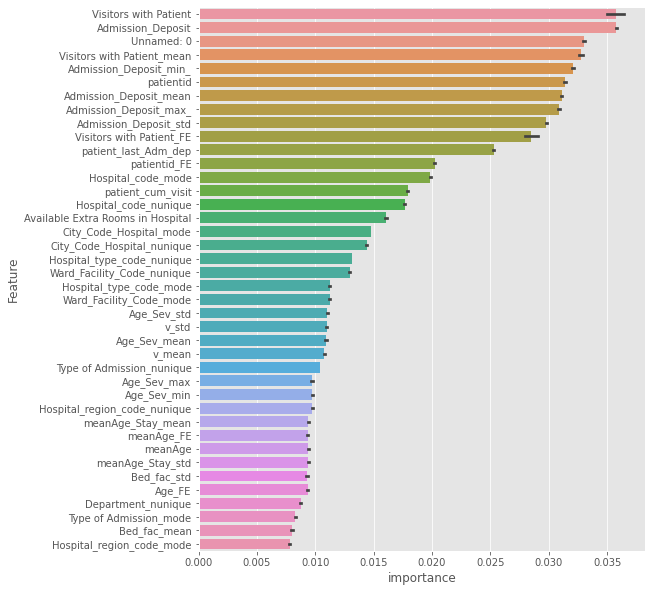

In [ ]:
import seaborn as sns
display_importances(feature_importance_df)

In [ ]:
train[usecols].shape, test[usecols].shape,len(usecols)

((318438, 330), (137057, 330), 236)

In [ ]:
#train.head()
FEATS_EXCLUDED = ['Stay','Unnamed: 0']
usecols = [f for f in train.columns if f not in FEATS_EXCLUDED]


In [ ]:
#list(test[usecols].columns)

In [ ]:
train.shape,test.shape

((318438, 238), (137057, 237))

In [ ]:
#np.unique(pred_test_full_rfc.round())

In [ ]:
results = pd.DataFrame() # predictionslgb
results['Stay'] = pred_test_full_rfc.round()
results['Stay'] = results['Stay'].map({0:'0-10',
                                    1:'11-20',
                                    2:'21-30',                                     
                                    3:'31-40',
                                    4:'41-50',
                                    5:'51-60',
                                    6:'61-70',
                                    7:'71-80',
                                    8:'81-90',
                                    9:'91-100',
                                    10:'More than 100 Days'
                                     })

In [ ]:
sample_sub['Stay'] = results['Stay']
sample_sub.to_csv(path+'/sample_submission_Aug_31st_RF.csv',index=False)

In [ ]:
#y.value_counts()

In [ ]:
# define a function to train the lightGBM model
from sklearn.metrics import log_loss
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None): 
    params = {}
    params["objective"] = "multiclass"
    params["boosting"] = "dart"
    params["is_unbalance"] = True
    
    params["num_class"] = 11   
    params["labels"] = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
    
    params['metric'] = 'multi_logloss'
    params["max_depth"] = 8
    params["min_data_in_leaf"] = 1
    params["learning_rate"] = 0.01
    params["bagging_fraction"] = 0.7
    params["feature_fraction"] = 0.7
    params["bagging_freq"] = 5
    params["bagging_seed"] = 0
    params["nthread"] =  4
    params["verbosity"] = -1
    #params["device_type"] = "gpu"
    
    num_rounds = 500

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=50)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    print(pred_test_y.shape)
    pred_test_y
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    #print('YPRED' + str(len(np.argmax(pred_test_y, axis = 1))))
    #print('YTRUE' + str(len(test_y)))

    #tp = pd.DataFrame(pred_test_y).idxmax(axis=1)
    # #tp.shape()
    #print(tp.value_counts())

    #tp1 =  pd.DataFrame(np.argmax(pred_test_y, axis = 1))    
    #tp1.shape()
    #print(tp1[0].value_counts())
    #test_y

    loss = 0
    if test_y is not None:
        #loss = log_loss(test_y, pred_test_y)
        #loss = log_loss(test_y, np.argmax(pred_test_y, axis = 1))
        print(loss)
        return np.argmax(pred_test_y, axis = 1), loss, np.argmax(pred_test_y2, axis = 1)
    else:
        return pred_test_y, loss, pred_test_y2

In [ ]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=8, eta=0.01):
        params = {}
        params["objective"] = "multi:softmax"
        params['eval_metric'] = 'mlogloss'
        params["eta"] = eta
        params["num_class"] = 11 
        params["subsample"] = 0.7
        params["min_child_weight"] = 10
        params["colsample_bytree"] = 0.7
        params["max_depth"] = dep
        params["silent"] = 1
        params["seed"] = seed_val
        #params["max_delta_step"] = 2
        #params["gamma"] = 0.5
        num_rounds = rounds

        plst = list(params.items())
        xgtrain = xgb.DMatrix(train_X, label=train_y)

        if test_y is not None:
                xgtest = xgb.DMatrix(test_X, label=test_y)
                watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
                model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
        else:
                xgtest = xgb.DMatrix(test_X)
                model = xgb.train(plst, xgtrain, num_rounds)

        pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
        pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)

        print(len(pred_test_y))
        print("Here 1")
        print(pred_test_y)

        # tp1 =  pd.DataFrame(pred_test_y)    
        # print("Here 2")
        # tp1.shape()
        # print(tp1[0].value_counts())
        # #test_y


        loss = 0
        if test_y is not None:
                #loss = metrics.log_loss(test_y, np.argmax(pred_test_y, axis = 1))
                #print(loss)
                return pred_test_y , loss, pred_test_y2
        else:
                return pred_test_y, loss, pred_test_y2

In [ ]:
# train lgb

In [ ]:
#train = traincopy
#test = testcopy

In [ ]:
%%time
kf = model_selection.GroupKFold(n_splits=5)
import lightgbm as lgb

cv_scores = []
pred_test_full = 0
ooflgb = np.zeros(train.shape[0])

for dev_index, val_index in kf.split(train[usecols], train["Stay"].values, train["patientid"].values):
    print(train["patientid"].loc[val_index].unique())

    dev_X, val_X = train[usecols].loc[dev_index,:], train[usecols].loc[val_index,:]
    dev_y, val_y = train["Stay"][dev_index], train["Stay"][val_index]
    
    pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, test[usecols])
    print("Now Here !! 1")
    ooflgb[val_index] = pred_val
    print("Now Here !! 2")
    pred_test_full += pred_test
    cv_scores.append(loss)
    print(cv_scores)
    
predictionslgb = pred_test_full
print("Now Here !! PRED")
#predictionslgb /= 5.
predictionslgb = round(pd.DataFrame(predictionslgb)[0]/5)
predictionslgb.value_counts()
print("Now Here !! FINISHED")

[ 33340  88451 127970 100096 ...  79108  26631    325  91081]
[50]	valid_0's multi_logloss: 1.79659
[100]	valid_0's multi_logloss: 1.83594
[150]	valid_0's multi_logloss: 1.86699
[200]	valid_0's multi_logloss: 1.85301
[250]	valid_0's multi_logloss: 1.83108
[300]	valid_0's multi_logloss: 1.79613
[350]	valid_0's multi_logloss: 1.78359
[400]	valid_0's multi_logloss: 1.74491
[450]	valid_0's multi_logloss: 1.71853
[500]	valid_0's multi_logloss: 1.70034
(63688, 11)
0
Now Here !! 1
Now Here !! 2
[0]
[  8088  64869  30632  82551 ...  41602 122839 120672  21641]
[50]	valid_0's multi_logloss: 1.79383
[100]	valid_0's multi_logloss: 1.83509
[150]	valid_0's multi_logloss: 1.86674
[200]	valid_0's multi_logloss: 1.85302
[250]	valid_0's multi_logloss: 1.83141
[300]	valid_0's multi_logloss: 1.79648
[350]	valid_0's multi_logloss: 1.78399
[400]	valid_0's multi_logloss: 1.7454
[450]	valid_0's multi_logloss: 1.71892
[500]	valid_0's multi_logloss: 1.70064
(63688, 11)
0
Now Here !! 1
Now Here !! 2
[0, 0]
[ 31

In [ ]:
#pd.DataFrame(ooflgb)[0].value_counts()
#train["Stay"].value_counts()
#loss = log_loss(train["Stay"], ooflgb)
#print(loss)

In [ ]:
#predictionslgb = round(pd.DataFrame(predictionslgb)[0]/5)

In [ ]:
predictionslgb.value_counts()

2.0     60056
1.0     40169
5.0     18741
3.0     11188
0.0      2200
10.0     1964
4.0      1206
6.0       585
7.0       424
8.0       380
9.0       144
Name: 0, dtype: int64

In [ ]:
path = "drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/"

In [ ]:
pd.DataFrame(predictionslgb).to_csv(path+'/lgb.csv')

In [ ]:
#pred_test_full

In [ ]:
# traincopy = train
# testcopy = test

In [ ]:
# train = traincopy #train.head(10000)
# test = testcopy #test.head(10000)
usecols = list(dict.fromkeys(usecols))

In [ ]:
train[usecols].shape, test[usecols].shape,len(usecols)

((318438, 236), (137057, 236), 208)

In [ ]:
#list(train[usecols].columns)
train['1_left']
list(usecols)

['Available Extra Rooms in Hospital',
 'patientid',
 'Visitors with Patient',
 'Admission_Deposit',
 'meanAge',
 'Admission_Deposit_mean',
 'Admission_Deposit_max_',
 'Admission_Deposit_min_',
 'Admission_Deposit_std',
 'Ward_Facility_Code_nunique',
 'Ward_Facility_Code_mode',
 'Department_nunique',
 'Department_mode',
 'Hospital_region_code_nunique',
 'Hospital_region_code_mode',
 'City_Code_Hospital_nunique',
 'City_Code_Hospital_mode',
 'Hospital_type_code_nunique',
 'Hospital_type_code_mode',
 'Hospital_code_nunique',
 'Hospital_code_mode',
 'Type of Admission_nunique',
 'Type of Admission_mode',
 'Severity of Illness_nunique',
 'Severity of Illness_mode',
 'Visitors with Patient_mean',
 'meanAge_hospital_mean',
 'meanAge_hospital_max_',
 'meanAge_hospital_min_',
 'meanAge_hospital_std',
 'Admission_Deposit_hospital_mean',
 'Admission_Deposit_hospital_max_',
 'Admission_Deposit_hospital_min_',
 'Admission_Deposit_hospital_std',
 'Type of Admission_hospital_nunique',
 'Type of Admis

In [ ]:
%%time
import xgboost as xgb
kf = model_selection.GroupKFold(n_splits=5)

cv_scores = []
pred_test_full = 0
#oofxgb = []
oof_xgb = np.zeros(train.shape[0])

for dev_index, val_index in kf.split(train[usecols], train["Stay"].values, train["patientid"].values):
    print(train["patientid"].loc[val_index].unique())

    dev_X, val_X = train[usecols].loc[dev_index,:], train[usecols].loc[val_index,:]
    dev_y, val_y = train["Stay"][dev_index], train["Stay"][val_index]
    
    #pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, test_X)
    pred_val1, loss1, pred_test1 = runXGB(dev_X, dev_y, val_X, val_y, test, rounds=500, dep=4)
    pred_val2, loss2, pred_test2 = runXGB(dev_X, dev_y, val_X, val_y, test, rounds=500, dep=4, seed_val=2020)
    pred_val3, loss3, pred_test3 = runXGB(dev_X, dev_y, val_X, val_y, test, rounds=500, dep=4, seed_val=9876)

    #pred_val = (round(pd.DataFrame(pred_val1) + round(pd.DataFrame(pred_val2) + round(pd.DataFrame(pred_val3))/3
    pred_val = (pred_val1 + pred_val2 + pred_val3)/3. 
    print("Now Here !! LAST")
    oof_xgb[val_index] = pred_val
    print("Now Here !! LAST")
    pred_test = (pred_test1 + pred_test2 + pred_test3)/3. 
    #(round(pd.DataFrame(pred_test1) + round(pd.DataFrame(pred_test2) + round(pd.DataFrame(pred_test3))/3 
    #(pred_test1 + pred_test2 + pred_test3)/3.    
    print("Now Here !! LAST")

    loss = (loss1 + loss2 + loss3)/3.
    
    cv_scores.append(loss)
    pred_test_full += pred_test
    print(cv_scores)

pred_test_full /= 5.
predictionsxgb = pred_test_full 

#predictionsxgb = round(pd.DataFrame(predictionsxgb)[0]/5)
#predictionsxgb.value_counts()



[ 33340  88451 127970 100096 ...  79108  26631    325  91081]


ValueError: ignored

In [ ]:
predictionsxgb.round()
pd.DataFrame(predictionsxgb.round()).to_csv(path+'/xgb.csv')

In [ ]:
# ensemble - logistic regression

In [ ]:

from sklearn.linear_model import LinearRegression
first_level = pd.DataFrame()
first_level_test = pd.DataFrame()

#first_level['lgb'] = ooflgb
#first_level['rfc'] = oof_rfc

first_level['dt'] = oof_tree
first_level['rfc'] = oof_rfc

#first_level_test['lgb'] = predictionslgb
#first_level_test['rfc'] = pred_test_full_rfc

first_level_test['dt'] = pred_test_full_tree
first_level_test['rfc'] = pred_test_full_rfc

meta_model = LinearRegression(n_jobs=-1)
meta_model.fit(first_level, train['Stay'])

ensemble_pred = meta_model.predict(first_level)
final_predictions = meta_model.predict(first_level_test)

In [ ]:
first_level['rfc'].value_counts()

2.0     119225
1.0      91975
3.0      43183
5.0      42028
0.0      11686
10.0      3858
7.0       2509
4.0       2042
8.0       1336
9.0        314
6.0        282
Name: rfc, dtype: int64

In [ ]:
len(pred_test_full_tree)
pred_test_full_rfc

array([0. , 5.4, 3.8, 2. , ..., 0.4, 2. , 2. , 5. ])

In [ ]:
#first_level_test
pd.DataFrame(final_predictions.round())[0].value_counts()

2.0    74579
3.0    21515
4.0    16306
5.0    15975
1.0     4922
6.0     2264
7.0      911
8.0      585
Name: 0, dtype: int64

In [ ]:
pd.DataFrame(final_predictions)[0].value_counts()

2.437296    14846
1.534640     6271
4.983779     3285
5.145264     3275
1.588468     3067
            ...  
6.073584        1
7.771240        1
7.448269        1
5.335723        1
6.688052        1
Name: 0, Length: 868, dtype: int64

In [ ]:
# save

In [ ]:
results = pd.DataFrame() # predictionslgb
results['Stay'] = first_level['rfc']
results['Stay'] = results['Stay'].map({0:'0-10',
                                    1:'11-20',
                                    2:'21-30',                                     
                                    3:'31-40',
                                    4:'41-50',
                                    5:'51-60',
                                    6:'61-70',
                                    7:'71-80',
                                    8:'81-90',
                                    9:'91-100',
                                    10:'More than 100 Days'
                                     })

In [ ]:
results = pd.DataFrame() # predictionslgb
results['Stay'] = predictionslgb.round() #first_level['rfc']
results['Stay'] = results['Stay'].map({0:'0-10',
                                    1:'11-20',
                                    2:'21-30',                                     
                                    3:'31-40',
                                    4:'41-50',
                                    5:'51-60',
                                    6:'61-70',
                                    7:'71-80',
                                    8:'81-90',
                                    9:'91-100',
                                    10:'More than 100 Days'
                                     })

In [ ]:
path = "drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/"

In [ ]:
sample_sub  = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/sample_submission.csv') 

In [ ]:
sample_sub['Stay'] = results['Stay']
sample_sub.to_csv(path+'/sample_submission_Aug_31st-lgb-3.csv',index=False)

In [ ]:
sample_sub

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,51-60
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,31-40
137053,455492,0-10
137054,455493,21-30
137055,455494,21-30


In [ ]:
# features = train.columns.values[2:202]
# scaler = StandardScaler()
# x_test = scaler.fit_transform(test[features])

In [ ]:
# fast ai

In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/test.csv')
sample_sub  = pd.read_csv('drive/My Drive/Colab Notebooks/Tabular/JanataHackHealthCare/inputs/sample_submission.csv') 

In [ ]:
train = combined.loc[combined['train_or_test'] == 0]
test = combined.loc[combined['train_or_test'] == 1]

# Drop key reference column
train = train.drop('train_or_test', axis=1)
test = test.drop('train_or_test', axis=1)
test = test.drop('Stay', axis=1)

#train = train.drop('case_id', 1)
#test = test.drop('case_id',1)

In [ ]:
#train['Unnamed: 0']
#train['case_id']

train = train.drop('case_id', 1)
test = test.drop('case_id',1)

train = train.drop('Unnamed: 0', 1)
test = test.drop('Unnamed: 0',1)


In [ ]:
train = train.drop('meanStay', 1)
test = test.drop('meanStay',1)

In [ ]:
#test.columns

In [ ]:
cat_vars = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
      'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','patientid','City_Code_Patient','Type of Admission','Severity of Illness','Age']
cont_vars = ['Available Extra Rooms in Hospital',  'Visitors with Patient','Admission_Deposit']

In [ ]:
cat_vars = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age']

# ,'Ward_Facility_Code_nunique',
#        'Ward_Facility_Code_mode','Department_nunique', 'Department_mode',
#        'Hospital_region_code_nunique', 'Hospital_region_code_mode',
#        'City_Code_Hospital_nunique', 'City_Code_Hospital_mode',
#        'Hospital_type_code_nunique', 'Hospital_type_code_mode',
#        'Hospital_code_nunique', 'Hospital_code_mode',
#        'Type of Admission_nunique', 'Type of Admission_mode',
#        'Severity of Illness_nunique', 'Severity of Illness_mode',
#        'Type of Admission_hospital_nunique',
#        'Type of Admission_hospital_mode',
#        'Severity of Illness_hospital_nunique',
#        'Severity of Illness_hospital_mode'
cont_vars =  ['Available Extra Rooms in Hospital',
       'Visitors with Patient',
       'Admission_Deposit', 'meanAge', 'Admission_Deposit_mean',
       'Admission_Deposit_max_', 'Admission_Deposit_min_',
       'Admission_Deposit_std',  
       'Visitors with Patient_mean', 'meanAge_hospital_mean',
       'meanAge_hospital_max_', 'meanAge_hospital_min_',
       'meanAge_hospital_std', 'Admission_Deposit_hospital_mean',
       'Admission_Deposit_hospital_max_', 'Admission_Deposit_hospital_min_',
       'Admission_Deposit_hospital_std', 
       'Available Extra Rooms in Hospital_hospital_mean',
       'Available Extra Rooms in Hospital_hospital_max_',
       'Available Extra Rooms in Hospital_hospital_min_',
       'Available Extra Rooms in Hospital_hospital_std', 'hosp_dept_Stay_min',
       'hosp_dept_Stay_max', 'hosp_dept_Stay_std', 'hosp_dept_Stay_mean',
       'hosp_Adm_Stay_min', 'hosp_Adm_Stay_max', 'hosp_Adm_Stay_std',
       'hosp_Adm_Stay_mean', 'hosp_sev_Stay_min', 'hosp_sev_Stay_max',
       'hosp_sev_Stay_std', 'hosp_sev_Stay_mean', 'Dept_Stay_min',
       'Dept_Stay_max', 'Dept_Stay_std', 'Dept_Stay_mean', 'Sev_Stay_min',
       'Sev_Stay_max', 'Sev_Stay_std', 'Sev_Stay_mean', 'Typ_Stay_min',
       'Typ_Stay_max', 'Typ_Stay_std', 'Typ_Stay_mean', 'patient_in_this_hosp',
       'patient_cum_visit', 'meanAge_Stay_min', 'meanAge_Stay_max',
       'meanAge_Stay_std', 'meanAge_Stay_mean', 'patient_last_Adm_dep']

In [ ]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
dep_var = 'Stay'

In [ ]:
data = (TabularList.from_df(train, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_rand_pct(valid_pct=0.10)                
                .label_from_df(cols=dep_var)
                .add_test(TabularList.from_df(test, cat_names=cat_vars, cont_names=cont_vars),label=0)
                .databunch())
#bs=1024

In [ ]:
def run_learner(learn):
  
  # start with a mega rate
  learn.fit_one_cycle(3, 3e-4)
  # 10x higher learn-rate with higher steps
  learn.fit_one_cycle(5, 1e-6, wd=0.3)
  # smaller rate with smaller steps
  learn.fit_one_cycle(5, 1e-07, wd=0.1)
  # plot losses
  learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(5e-3, 2e-3), moms=(0.8,0.7))

In [ ]:
data.show_batch(rows= 6)

Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Age,Admission_Deposit_std_na,patient_last_Adm_dep_na,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,meanAge,Admission_Deposit_mean,Admission_Deposit_max_,Admission_Deposit_min_,Admission_Deposit_std,Visitors with Patient_mean,meanAge_hospital_mean,meanAge_hospital_max_,meanAge_hospital_min_,meanAge_hospital_std,Admission_Deposit_hospital_mean,Admission_Deposit_hospital_max_,Admission_Deposit_hospital_min_,Admission_Deposit_hospital_std,Available Extra Rooms in Hospital_hospital_mean,Available Extra Rooms in Hospital_hospital_max_,Available Extra Rooms in Hospital_hospital_min_,Available Extra Rooms in Hospital_hospital_std,hosp_dept_Stay_min,hosp_dept_Stay_max,hosp_dept_Stay_std,hosp_dept_Stay_mean,hosp_Adm_Stay_min,hosp_Adm_Stay_max,hosp_Adm_Stay_std,hosp_Adm_Stay_mean,hosp_sev_Stay_min,hosp_sev_Stay_max,hosp_sev_Stay_std,hosp_sev_Stay_mean,Dept_Stay_min,Dept_Stay_max,Dept_Stay_std,Dept_Stay_mean,Sev_Stay_min,Sev_Stay_max,Sev_Stay_std,Sev_Stay_mean,Typ_Stay_min,Typ_Stay_max,Typ_Stay_std,Typ_Stay_mean,patient_in_this_hosp,patient_cum_visit,meanAge_Stay_min,meanAge_Stay_max,meanAge_Stay_std,meanAge_Stay_mean,patient_last_Adm_dep,target
24,0,1,0,2,2,4,2.0,44400,1.0,2,2,61-70,False,False,-1.8810,-0.7276,0.3614,0.9903,1.7848,1.9154,1.4860,0.4521,-0.7657,-1.0068,0.0000,0.0000,-0.2144,0.9337,0.2202,-0.4900,0.2559,0.1358,-0.5841,1.0634,-0.7324,-0.0282,0.0672,-1.5893,-1.3936,0.0000,0.0297,-1.8494,-1.5285,0.0000,0.0411,-1.3729,-1.0609,0.0000,0.0000,-0.0403,0.1466,0.0000,0.0000,0.1572,0.1701,0.0000,0.0000,-2.1541,-1.0583,-0.7869,2.1762,0.0000,0.0000,0.8547,0.7458,0.7323,2.0
23,0,6,0,2,1,5,4.0,48417,26.0,2,2,31-40,False,False,0.6871,-0.7276,0.0779,-0.5967,-0.3001,-0.2909,-0.5570,-0.4301,-0.9671,0.0772,0.0000,0.0000,0.1294,-0.4758,0.7992,-0.4302,1.2146,0.8676,-0.3671,-0.9404,0.2824,-0.0282,0.0672,-0.4300,0.1158,0.0000,0.0297,-1.2282,-0.6393,0.0000,0.0411,-0.1126,0.2488,0.0000,0.0000,-0.0403,0.1466,0.0000,0.0000,0.1572,0.1701,0.0000,0.0000,-2.1541,-1.0583,1.3090,3.0527,0.0000,0.0000,-0.8256,-0.5839,-1.0572,1.0
28,1,11,0,3,2,5,3.0,91969,1.0,1,2,71-80,False,True,-0.1689,1.5406,-0.8814,1.5193,-0.8173,-0.2997,-0.4892,-0.5614,-0.1390,1.6339,0.0000,0.0000,-1.6035,-0.3735,1.3402,-0.3703,0.4217,-0.6362,-0.8010,-0.9404,-1.3367,-0.0282,0.0672,0.7546,0.6917,0.0000,0.0297,0.4508,0.7725,0.0000,0.0411,0.3966,0.3562,0.0000,0.0000,2.5227,1.4643,0.0000,0.0000,0.1572,0.1701,0.0000,0.0000,0.0015,1.0438,-0.0036,-0.8916,0.0000,0.0000,1.2029,1.1584,-0.1069,3.0
25,4,1,0,2,2,4,4.0,37716,1.0,1,2,31-40,False,False,1.5432,-0.7276,-0.6954,-0.5967,-0.2176,-0.3797,0.1223,-0.3365,-0.7657,0.7594,0.0000,0.0000,0.3334,-0.6582,-0.9511,-0.4102,-0.1660,-1.2063,-0.5841,1.0634,-0.6020,-0.0282,0.0672,1.3078,1.2516,0.0000,0.0297,1.3687,1.5450,0.0000,0.0411,1.2366,1.1326,0.0000,0.0000,-0.0403,0.1466,0.0000,0.0000,0.1572,0.1701,0.0000,0.0000,0.0015,1.0438,-0.5660,-0.0151,0.0000,0.0000,-0.8256,-0.5839,-0.2680,2.0
23,0,6,0,2,1,5,3.0,51189,2.0,1,0,61-70,False,False,0.6871,0.4065,-0.7304,0.9903,0.0675,0.6348,0.0746,0.4392,0.6923,0.0772,0.0000,0.0000,0.1294,-0.4758,0.7992,-0.4302,1.2146,0.8676,-0.3671,-0.9404,0.2824,-0.0282,0.0672,-0.4300,0.1158,0.0000,0.0297,-0.0973,0.5368,0.0000,0.0411,1.0545,1.1156,0.0000,0.0000,-0.0403,0.1466,0.0000,0.0000,1.6148,1.5941,0.0000,0.0000,0.0015,1.0438,1.3090,0.8614,0.0000,0.0000,0.8547,0.7458,-0.6493,0.0
26,1,2,1,3,2,3,2.0,795,8.0,0,0,71-80,False,False,-1.0249,-0.1606,2.0388,1.5193,2.0153,2.0689,1.0917,1.2943,-0.5509,-0.5681,0.0000,0.0000,0.0250,0.0834,-0.7138,-0.5000,0.6462,0.4202,2.0191,-0.9404,1.3478,-0.0282,0.0672,2.0895,1.4737,0.0000,0.0297,1.4726,0.8393,0.0000,0.0411,1.7476,1.8015,0.0000,0.0000,2.5227,1.4643,0.0000,0.0000,1.6148,1.5941,0.0000,0.0000,0.8886,-0.9135,1.9239,-0.0151,0.0000,0.0000,1.2029,1.1584,0.7745,7.0


In [ ]:
#[400,150]
learn = tabular_learner(data, layers=[400,200],metrics=accuracy,ps=[0.001,0.01], emb_drop=0.02,emb_szs={'Severity of Illness': 2,'Age': 2,'Admission_Deposit': 2})

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.74E-02


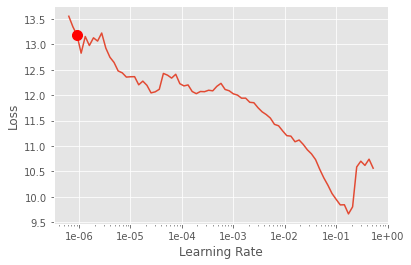

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,10.063274,10.403117,0.075652,01:18


In [ ]:
#trainpatientID = set(train['patientid'])
#testpatientID = set(test['patientid'])

In [ ]:
#print("set1 intersection set2 : ", testpatientID.intersection(testpatientID)) 

set1 intersection set2 :  {131075, 131076, 131077, 5, 131079, 8, 131081, 3, 11, 12, 131084, 15, 16, 131089, 131090, 131088, 131092, 20, 23, 24, 25, 131095, 27, 131100, 131101, 28, 131103, 32, 131105, 34, 131104, 37, 40, 131114, 131116, 44, 46, 47, 48, 131119, 52, 56, 131130, 131131, 60, 61, 62, 131136, 131137, 65, 131140, 131143, 72, 131146, 75, 131149, 131150, 131151, 80, 81, 131155, 131158, 87, 131163, 131164, 131166, 131168, 96, 98, 131171, 131172, 131173, 99, 131175, 131177, 106, 131182, 110, 112, 131186, 114, 131188, 117, 116, 119, 120, 131194, 123, 131198, 127, 128, 131199, 131202, 131, 132, 131206, 131207, 136, 137, 138, 131211, 131209, 142, 143, 144, 131217, 146, 131218, 150, 131224, 131227, 157, 131230, 160, 131233, 162, 163, 131236, 131238, 169, 131242, 171, 131243, 131245, 131246, 174, 131249, 131250, 179, 131252, 131253, 184, 131257, 188, 190, 191, 131263, 194, 195, 196, 131268, 198, 131269, 131272, 200, 202, 131273, 131276, 131277, 131278, 206, 131281, 213, 214, 131286, 21

In [ ]:
learn.unfreeze(1)
r = 1e-1
learn.fit_one_cycle(2, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.709205,2.955726,0.283485,02:22
1,1.497408,1.729000,0.427221,02:21


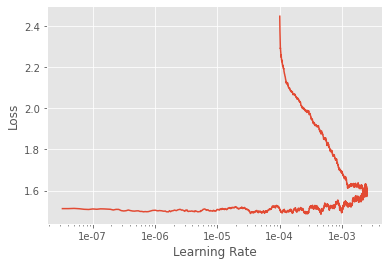

In [ ]:
learn.recorder.plot()

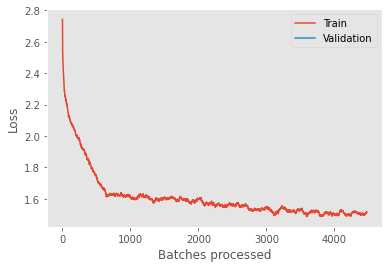

In [ ]:
learn.recorder.plot_losses()

In [ ]:
test_preds, targets = learn.get_preds(ds_type=DatasetType.Test)
predictions = np.argmax(test_preds, axis = 1) 
predictions

tensor([0, 5, 2,  ..., 1, 1, 5])

In [ ]:
# save

In [ ]:
results = pd.DataFrame(data=predictions, columns=["Stay"])
results['Stay'] = results['Stay'].map({0:'0-10',
                                    1:'11-20',
                                    2:'21-30',                                     
                                    3:'31-40',
                                    4:'41-50',
                                    5:'51-60',
                                    6:'61-70',
                                    7:'71-80',
                                    8:'81-90',
                                    9:'91-100',
                                    10:'More than 100 Days'
                                     })

In [ ]:
sample_sub['Stay'] = results['Stay']
sample_sub.to_csv(path+'/sample_submission_Aug_29th-fastai-2.csv',index=False)

In [ ]:
#Ensembles Code

In [ ]:
X_train_level2 = pd.DataFrame()
X_train_level2['lgb']= ooflgb
X_train_level2['xgb'] = oof_xgb

y_train_level2 = train["Stay"]

In [ ]:
from sklearn.metrics import r2_score
alphas_to_try = np.linspace(0, 1, 1001)

best_alpha = -1
r2_train_simple_mix = -1

for current_alpha in alphas_to_try:
    mix = current_alpha * X_train_level2['lgb'] + (1 - current_alpha) * X_train_level2['xgb']
    current_r2 = r2_score(y_train_level2, mix)
    
    if(current_r2 > r2_train_simple_mix):
        r2_train_simple_mix = current_r2
        best_alpha = current_alpha

print('Best alpha: %f; Corresponding r2 score on train: %f' % (best_alpha, r2_train_simple_mix))

In [ ]:
s1 = pd.DataFrame({"Stay":predictionslgb}) # LGB
s2 = pd.DataFrame({"Stay":predictionsxgb}) # XGB
s3 = pd.DataFrame({"Stay":predictions}) # fast ai
s3 = pd.DataFrame({"Stay":final_predictions}) # meta model (DT + RF + XGB + LGB)

sfin = pd.DataFrame()

In [ ]:
s3 = pd.DataFrame()

lsize = test.shape[0]

sfin["Stay"] = 0.95 * (s1["Stay"].rank()/lsize) + 0.05 * (s2["Stay"].rank()/lsize)
#s3["is_click"] =  0.9 * (X_train_level2['lgb'].rank()/test_shape0) + 0.1* (X_train_level2['xgb'].rank()/test_shape0)


In [ ]:
results = s3

In [ ]:
results['Stay'] = results['Stay'].map({0:'0-10',
                                    1:'11-20',
                                    2:'21-30',                                     
                                    3:'31-40',
                                    4:'41-50',
                                    5:'51-60',
                                    6:'61-70',
                                    7:'71-80',
                                    8:'81-90',
                                    9:'91-100',
                                    10:'More than 100 Days'
                                     })

In [ ]:
sample_sub['Stay'] = results['Stay']
sample_sub.to_csv(path+'/sample_submission_Aug_29th-Ensemble.csv',index=False)

In [ ]:
#finish

In [ ]:
#ensemble by percent
# s6 = pd.DataFrame({"id":test_df["id"].values})
# test_shape0 = s6.shape[0]

# s4 = pd.read_csv("sub_ens2.csv")
# s5 = pd.read_csv("sub_ens_new.csv")

# s6["is_click"] = ((s5["is_click"].rank()/test_shape0) + (s5["is_click"].rank()/test_shape0))/2
# s6.to_csv("sub_ens3.csv", index=False)

In [ ]:
# Fetaure Engineering

In [ ]:
#29th Aug + Blent - DT + LGB + RF or some combination